In [14]:
%matplotlib inline 
import matplotlib.pylab as plt 
plt.rcParams.update({'figure.max_open_warning': 0})
import numpy as np 
import pandas as pd 
import seaborn as sns 
import importlib
import drought_ibf_utility as ibf
importlib.reload(ibf)

<module 'drought_ibf_utility' from 'D:\\Behrouz\\Big_data\\Red_Cross\\Drought_IBF\\Model Event Data\\drought_ibf_utility.py'>

In [3]:
filename = './datasets/Uganda_seasonal_normalized.csv'
data = pd.read_csv(filename)
data.dropna(inplace=True)
data.head()

,year,District,Season,EVI,NDVI,SPEI_3month,SoilMoisture00_10cm,SoilMoisture100_200cm,SoilMoisture10_40cm,SoilMoisture40_100cm,...,air_temperature,evapotranspiration,precipitation_per_hour_v1,precipitation_per_hour_v2,rainfall,surface_temperature_daytime,surface_temperature_nighttime,water_balance,wind_speed,drought_reported
0,2000,ABIM,11_12,0.635496,0.232554,0.946693,0.876312,0.199678,0.736812,0.605763,...,-0.435935,1.208654,1.601028,-0.469460,1.336204,-0.151764,-1.343323,0.841488,-0.412148,False
1,2000,ABIM,6_7,-1.590836,-1.720571,0.075238,-1.302612,-1.113239,-1.262019,-0.937505,...,1.570308,-0.740945,-0.358292,-1.030145,-0.388903,1.260564,0.032762,-0.114317,0.306375,False
2,2000,ADJUMANI,11_12,-1.085335,-1.260320,-0.606487,-0.724946,-0.722124,-0.683251,-0.829818,...,-0.221168,-1.138716,0.041021,-2.093348,-1.024165,1.721439,-1.782573,-0.675508,-0.412293,False
3,2000,ADJUMANI,6_7,-2.697474,-3.056846,-0.816605,-0.872943,0.243240,-0.161562,0.000243,...,1.546512,-0.115219,-1.671680,-1.859843,-0.681410,2.350867,-0.480881,-0.793150,0.608132,False
4,2000,AGAGO,11_12,1.149972,-0.070580,0.824262,0.874588,0.624983,0.793872,0.710458,...,-0.380892,1.126550,1.366786,0.265181,0.963633,-0.414698,-2.063056,0.573377,-0.467823,False


In [4]:
id_cols = ['year','District','Season']

label_name = 'drought_reported'

All_features = list(data.drop(labels=id_cols+[label_name], 
                                  axis=1).columns)

### Loop through the features to select the best ones

In [15]:
f1_scores = []

for feature in All_features:
    
    _,_,f,_ = ibf.fit_threshold_model(data,feature,label_name,Plot=False)
    
    f1_scores.append(f)

F_scores = pd.DataFrame()
F_scores['feature'] = All_features
F_scores['score'] = f1_scores
F_scores.sort_values(by='score',inplace=True,ascending=False)
F_scores

,feature,score
8,SoilTemperature100_200cm,0.675695
3,SoilMoisture00_10cm,0.669211
10,SoilTemperature40_100cm,0.668269
18,water_balance,0.664768
14,precipitation_per_hour_v2,0.658543
15,rainfall,0.653662
2,SPEI_3month,0.651559
19,wind_speed,0.646070
5,SoilMoisture10_40cm,0.645819
6,SoilMoisture40_100cm,0.638440


### Building the model on the two best features 

                 Confusion matrix
                 Score positive    Score negative
Actual positive        48                17
Actual negative        25                40

Accuracy  0.68
Average F-score  0.68
 
           Positive      Negative
Num case       65            65
Precision    0.66          0.70
Recall       0.74          0.62
F-score      0.70          0.66


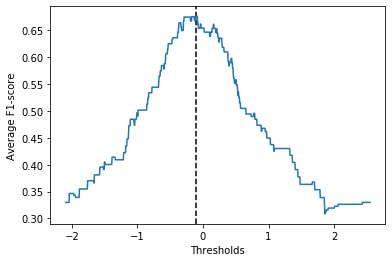

In [16]:
feature = 'SoilTemperature100_200cm'

y,y_pred,f,_ = ibf.fit_threshold_model(data,feature,label_name,Plot=True)

ibf.print_metrics(y, y_pred)

                 Confusion matrix
                 Score positive    Score negative
Actual positive        44                21
Actual negative        22                43

Accuracy  0.67
Average F-score  0.67
 
           Positive      Negative
Num case       65            65
Precision    0.67          0.67
Recall       0.68          0.66
F-score      0.67          0.67


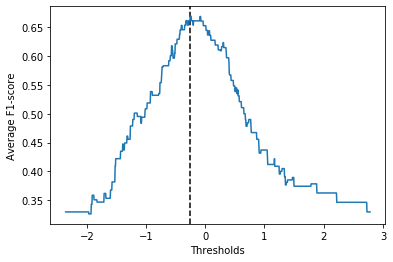

In [17]:
feature = 'SoilMoisture00_10cm'

y,y_pred,f,_ = ibf.fit_threshold_model(data,feature,label_name,Plot=True)

ibf.print_metrics(y, y_pred)